# Effects of new calibration - shock to $G_t$

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Effects of individual parameters](#toc2_)    
- 3. [Total effect of new calibration](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [125]:
model = BabyMAKROModelClass(name='baseline')

**Unpack namespaces:**

In [126]:
par = model.par
ss = model.ss
sol = model.sol
par.t_b = 1         # the government chooses to fix its tax rate for 1 year

**Shock specification:**

In [127]:
Tshock = 50                                                    # length of shock
persistence = 0.5**np.arange(Tshock)                           # persistence of shock

## 2. <a id='toc2_'></a>[Effects of individual parameters](#toc0_)

**Effects of reduced $r_{hh}$ (reduced from $0.04$ to $0.02$):**

In [128]:
parameter = 'r_hh'                                # set parameter 
parvalues = [0.04,0.03,0.02]                      # set parameter values
models = model.multi_model(parameter,parvalues)   # create one model for each value

Jacobian calculated in 2.0 mins 6 secs
Jacobian calculated in 1.0 mins 40 secs
Jacobian calculated in 1.0 mins 40 secs


In [129]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.05083 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.10780 secs
evaluate + update: t3-t2 = 0.07774 secs
initial:
t1-t0 = 0.04829 secs
it = 3
    max. abs. error = 8.19e-11
    7.67e-13 in A_R_ini_error
    2.62e-13 in Aq_diff
    7.24e-13 in FOC_capital_agency
    2.38e-12 in FOC_K_ell
    8.19e-11 in mkt_clearing
    2.09e-12 in PC

solve: t1-t0 = 0.10515 secs
evaluate + update: t3-t2 = 0.07774 secs
initial:
t1-t0 = 0.04795 secs
it = 3
    max. abs. error = 8.21e-11
    7.86e-13 in A_R_ini_error
    2.65e-13 in Aq_diff
    7.15e-13 in FOC_capital_agency
    2.39e-12 in FOC_K_ell
    8.21e-11 in mkt_clearing
    2.08e-12 in PC

solve: t1-t0 = 0.08662 secs
evaluate + update: t3-t2 = 0.07475 secs


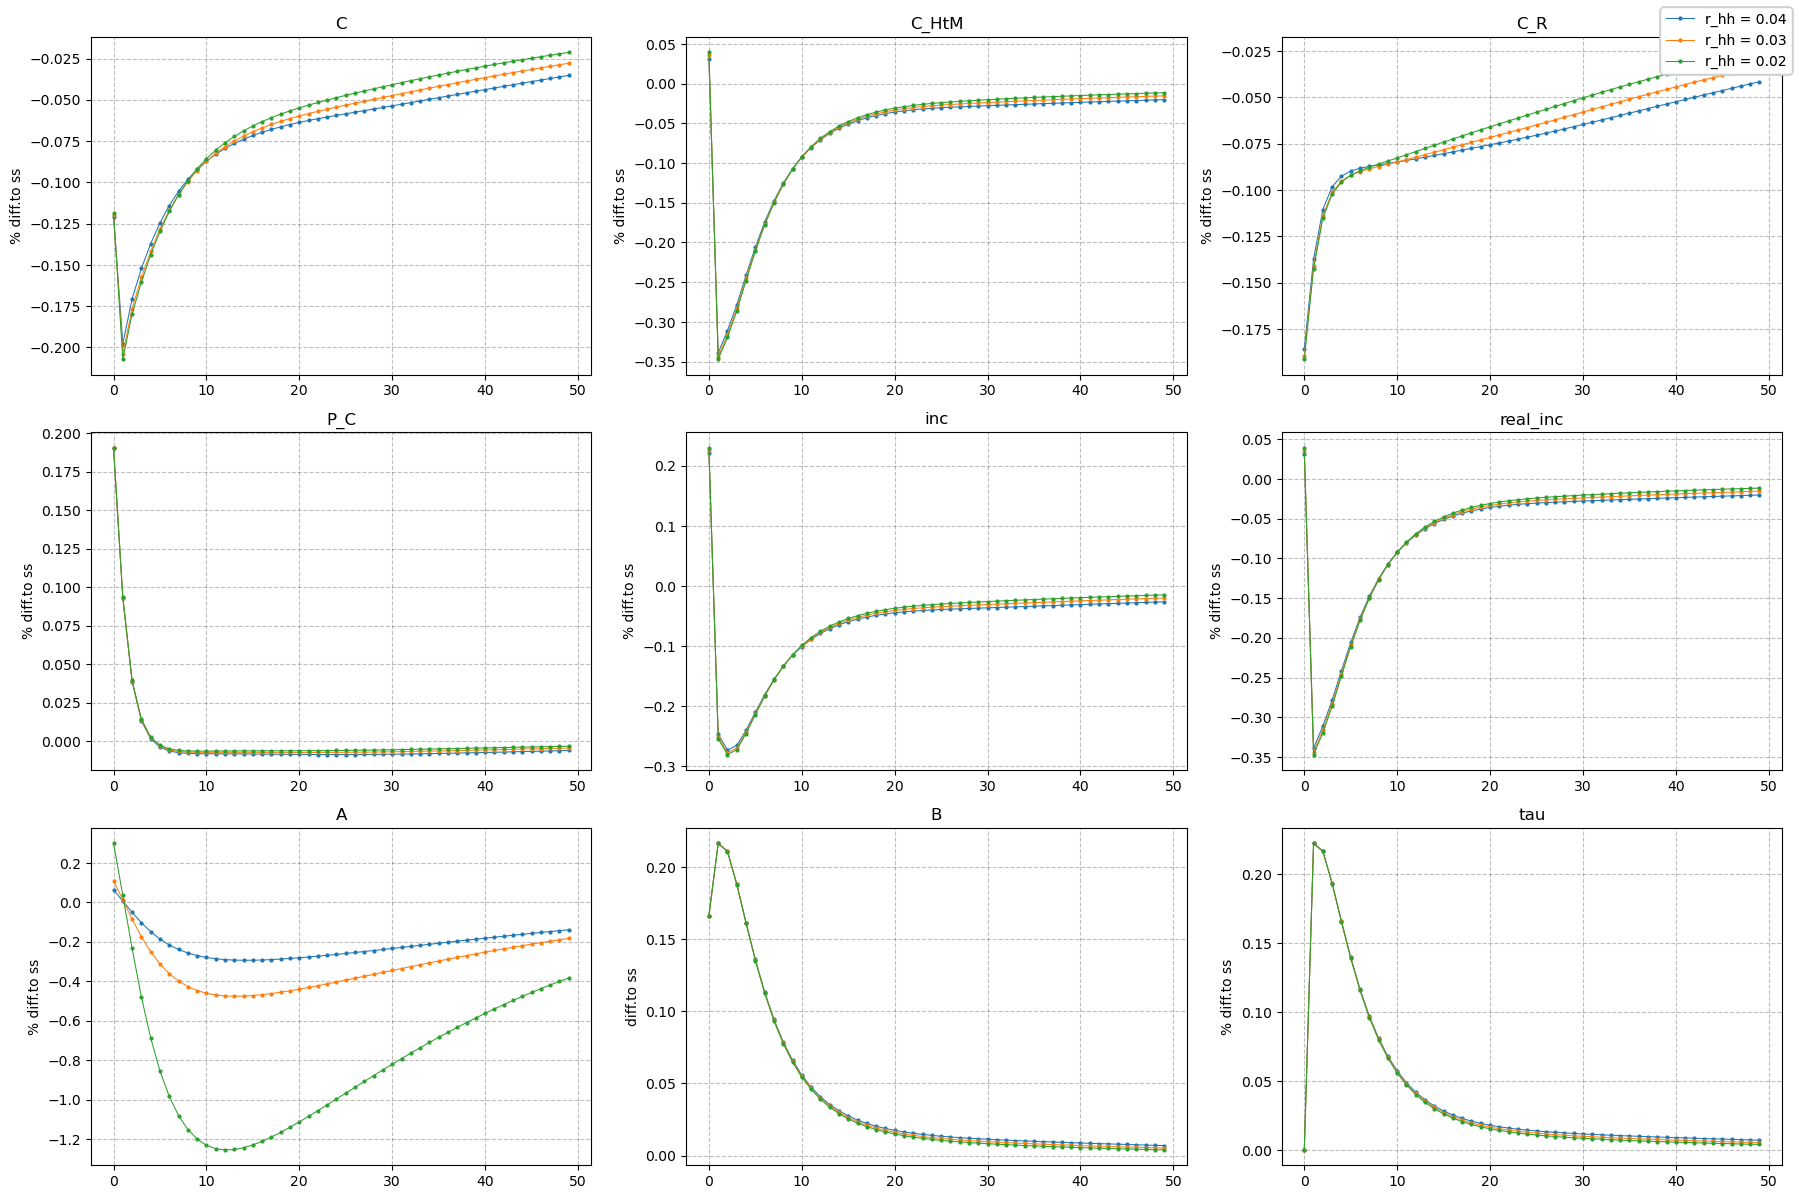

In [130]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])

**Effects of reduced $r_{firm}$ (reduced from $0.04$ to $0.02$):**

In [131]:
parameter = 'r_firm'                              # set parameter 
parvalues = [0.04,0.03,0.02]                      # set parameter values
models = model.multi_model(parameter,parvalues)   # create one model for each value

Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 53 secs


In [132]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.04884 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.09775 secs
evaluate + update: t3-t2 = 0.07584 secs
initial:
t1-t0 = 0.04784 secs
it = 3
    max. abs. error = 7.98e-11
    7.62e-13 in A_R_ini_error
    2.59e-13 in Aq_diff
    7.21e-13 in FOC_capital_agency
    2.24e-12 in FOC_K_ell
    7.98e-11 in mkt_clearing
    2.09e-12 in PC

solve: t1-t0 = 0.08976 secs
evaluate + update: t3-t2 = 0.07675 secs
initial:
t1-t0 = 0.04784 secs
it = 3
    max. abs. error = 7.68e-11
    7.46e-13 in A_R_ini_error
    2.58e-13 in Aq_diff
    7.03e-13 in FOC_capital_agency
    2.04e-12 in FOC_K_ell
    7.68e-11 in mkt_clearing
    2.05e-12 in PC

solve: t1-t0 = 0.10762 secs
evaluate + update: t3-t2 = 0.07874 secs


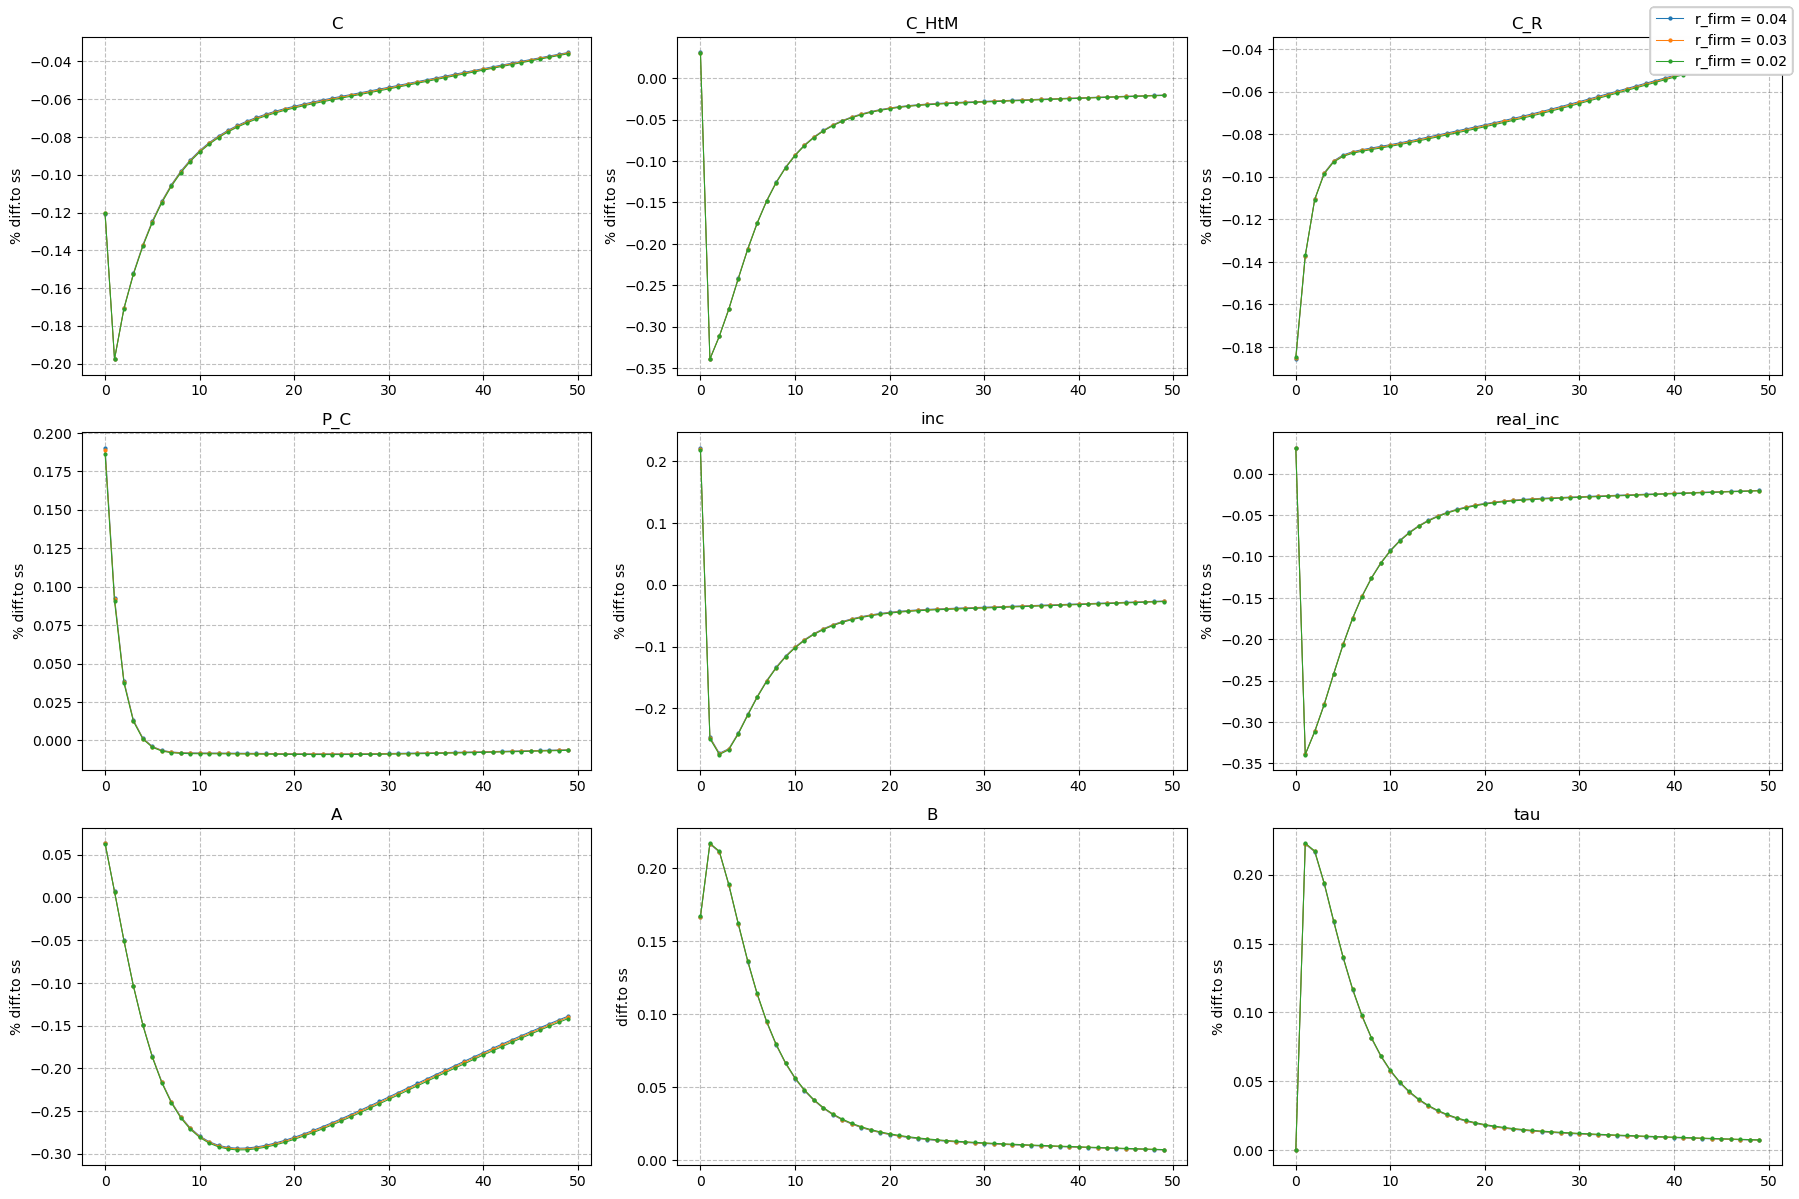

In [133]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])

**Effects of reduced $r_{b}$ (reduced from $0.04$ to $0.02$):**

In [134]:
parameter = 'r_b'                                 # set parameter 
parvalues = [0.04,0.03,0.02]                      # set parameter values
models = model.multi_model(parameter,parvalues)   # create one model for each value

Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 52 secs
Jacobian calculated in 1.0 mins 52 secs


In [135]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.04884 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.07114 secs
evaluate + update: t3-t2 = 0.07674 secs
initial:
t1-t0 = 0.04910 secs
it = 3
    max. abs. error = 8.41e-11
    7.41e-13 in A_R_ini_error
    2.49e-13 in Aq_diff
    7.39e-13 in FOC_capital_agency
    2.39e-12 in FOC_K_ell
    8.41e-11 in mkt_clearing
    2.11e-12 in PC

solve: t1-t0 = 0.09944 secs
evaluate + update: t3-t2 = 0.07553 secs
initial:
t1-t0 = 0.04784 secs
it = 3
    max. abs. error = 8.42e-11
    7.01e-13 in A_R_ini_error
    2.39e-13 in Aq_diff
    7.43e-13 in FOC_capital_agency
    2.41e-12 in FOC_K_ell
    8.42e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.09904 secs
evaluate + update: t3-t2 = 0.07568 secs


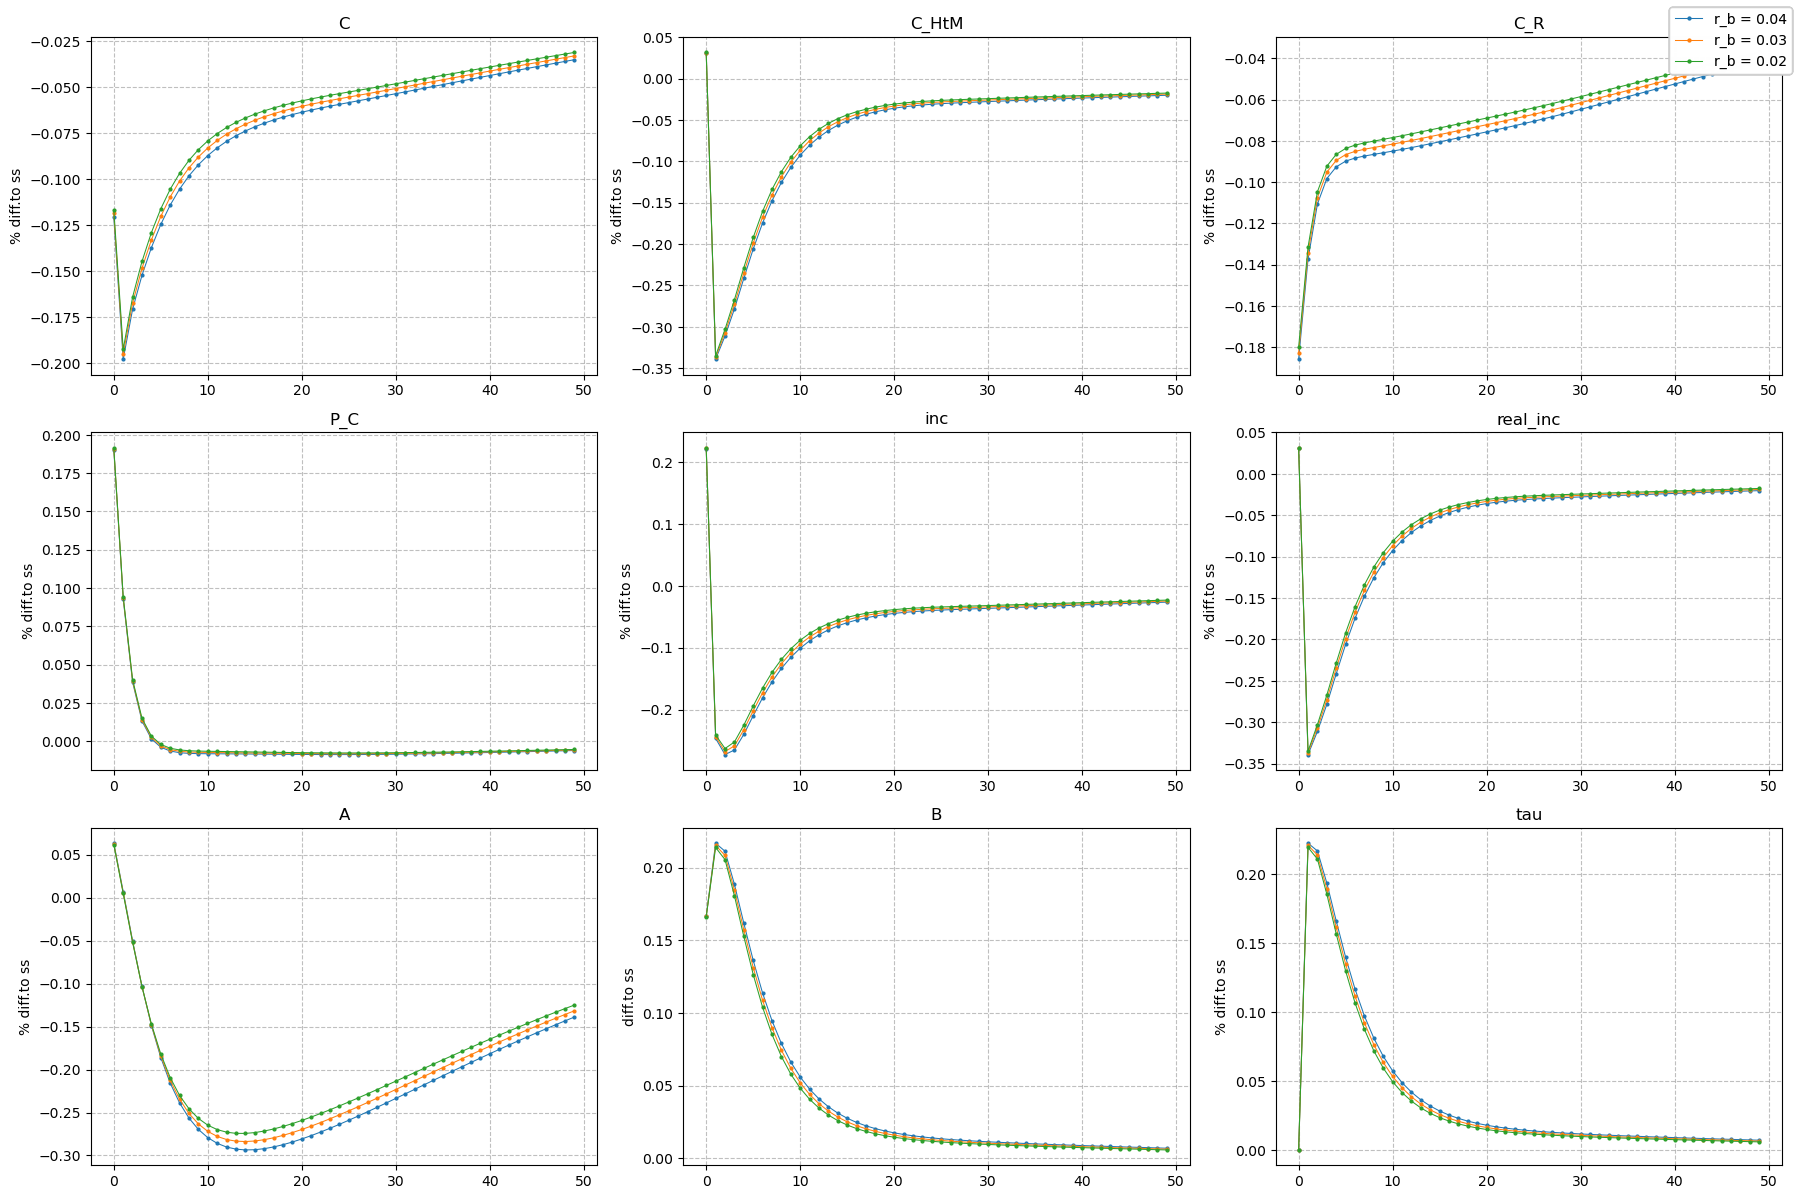

In [136]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])

**Effects of increased $\gamma$ (increased from $1.0$ to $300$, thus $\eta = 30$):**

In [137]:
parameter = 'gamma'                               # set parameter 
parvalues = [1.0,100.0,300.0]                     # set parameter values
models = model.multi_model(parameter,parvalues)   # create one model for each value

Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 52 secs


In [138]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.04804 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.10895 secs
evaluate + update: t3-t2 = 0.07884 secs
initial:
t1-t0 = 0.04983 secs
it = 4
    max. abs. error = 8.66e-12
    2.23e-13 in A_R_ini_error
    1.55e-14 in Aq_diff
    2.22e-15 in FOC_capital_agency
    8.66e-12 in FOC_K_ell
    5.07e-12 in mkt_clearing
    6.60e-13 in PC

solve: t1-t0 = 0.11070 secs
evaluate + update: t3-t2 = 0.07874 secs
initial:
t1-t0 = 0.04784 secs
it = 5
    max. abs. error = 4.25e-12
    1.52e-13 in A_R_ini_error
    5.77e-15 in Aq_diff
    2.44e-15 in FOC_capital_agency
    1.26e-12 in FOC_K_ell
    4.25e-12 in mkt_clearing
    4.40e-13 in PC

solve: t1-t0 = 0.10295 secs
evaluate + update: t3-t2 = 0.08158 secs


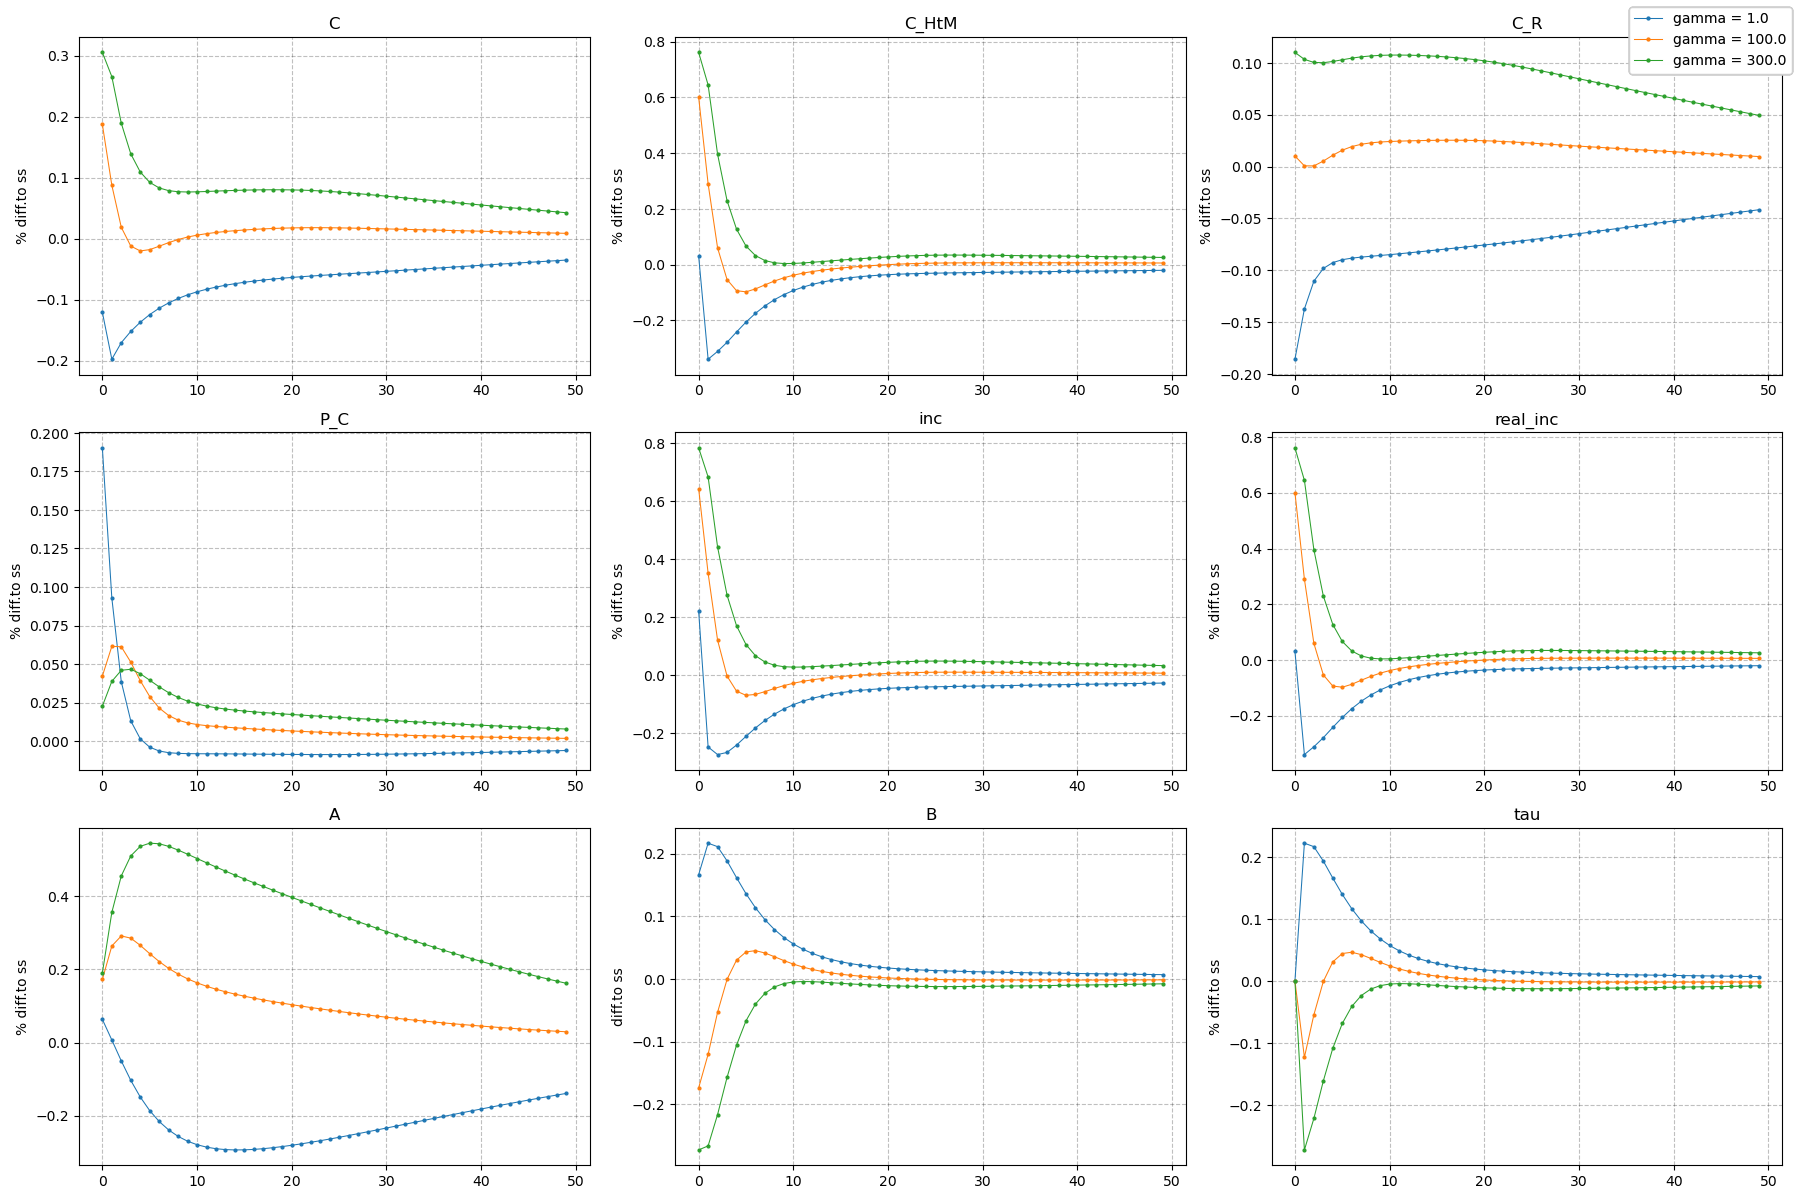

In [139]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])

**Effects of reduced $\epsilon_B$ (reduced from $0.25$ to $0.15$):**

In [140]:
parameter = 'epsilon_B'                           # set parameter 
parvalues = [0.25,0.20,0.15]                      # set parameter values
models = model.multi_model(parameter,parvalues)   # create one model for each value

Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 53 secs
Jacobian calculated in 1.0 mins 53 secs


In [141]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           

initial:
t1-t0 = 0.05456 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.10266 secs
evaluate + update: t3-t2 = 0.08173 secs
initial:
t1-t0 = 0.05083 secs
it = 3
    max. abs. error = 8.24e-11
    7.47e-13 in A_R_ini_error
    2.71e-13 in Aq_diff
    7.28e-13 in FOC_capital_agency
    2.78e-12 in FOC_K_ell
    8.24e-11 in mkt_clearing
    2.15e-12 in PC

solve: t1-t0 = 0.07475 secs
evaluate + update: t3-t2 = 0.09468 secs
initial:
t1-t0 = 0.05482 secs
it = 3
    max. abs. error = 8.44e-11
    7.53e-13 in A_R_ini_error
    2.72e-13 in Aq_diff
    7.23e-13 in FOC_capital_agency
    3.30e-12 in FOC_K_ell
    8.44e-11 in mkt_clearing
    2.20e-12 in PC

solve: t1-t0 = 0.06678 secs
evaluate + update: t3-t2 = 0.08073 secs


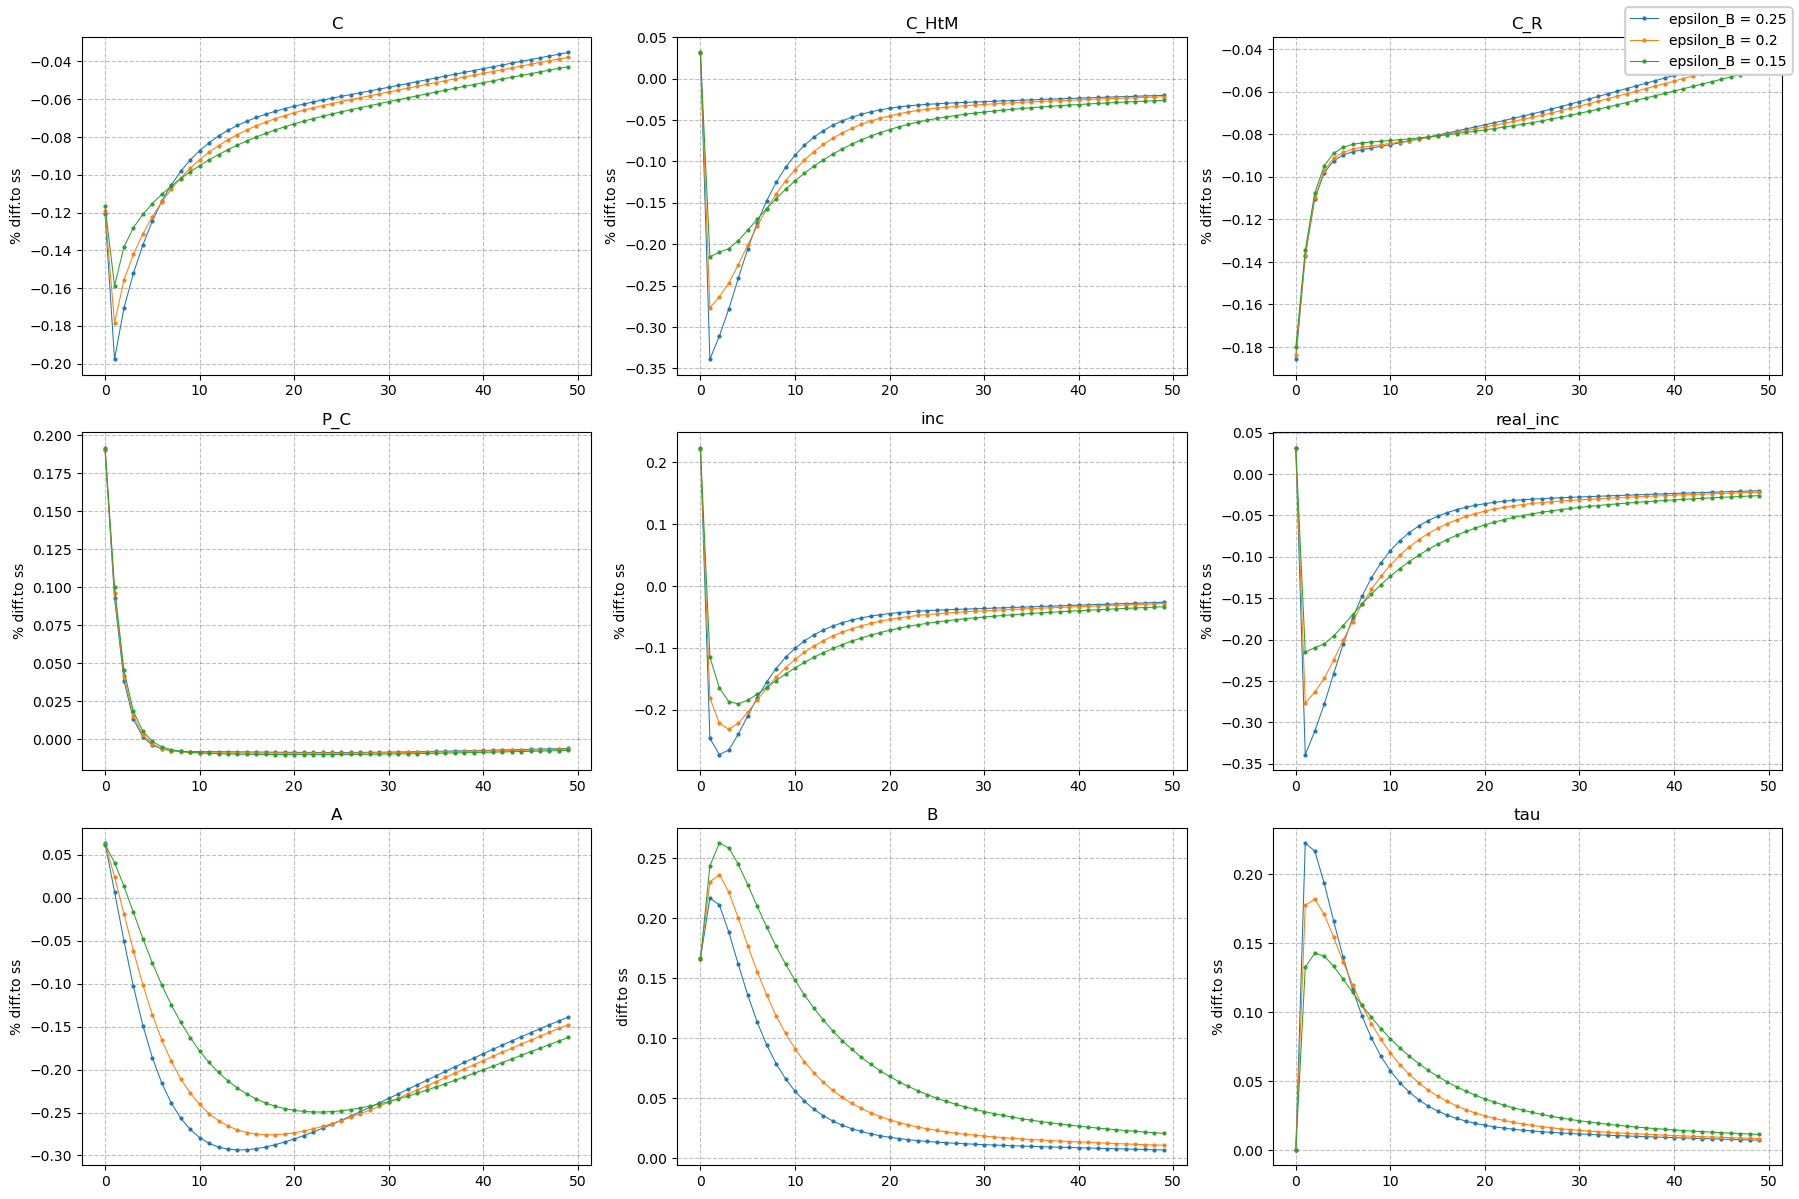

In [142]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])

## 3. <a id='toc3_'></a>[Total effect of new calibration](#toc0_)

**Compare IRFs for different parameters:**

In [143]:
parameters = ['r_hh', 'r_firm', 'r_b', 'gamma', 'epsilon_B']                # set parameters
parvalues_0 = [0.02, 0.02, 0.02, 300.0, 0.15]                               # set parameter values for model 0 (new parameter values)
parvalues_1 = [0.04, 0.04, 0.04, 1.0, 0.25]                                 # set parameter values for model 1 (old parameter values)
models = model.multi_model_extra(parameters,parvalues_0,parvalues_1)        # create model 0 and model 1

Jacobian calculated in 1.0 mins 52 secs
Jacobian calculated in 1.0 mins 51 secs


In [144]:
for model_ in models:

    model_.set_exo_ss()                                         
    model_.set_unknowns_ss()                                             
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                

initial:
t1-t0 = 0.04822 secs
it = 5
    max. abs. error = 3.07e-12
    1.02e-13 in A_R_ini_error
    4.00e-15 in Aq_diff
    2.44e-15 in FOC_capital_agency
    3.07e-12 in FOC_K_ell
    2.77e-12 in mkt_clearing
    2.60e-13 in PC

solve: t1-t0 = 0.10310 secs
evaluate + update: t3-t2 = 0.07893 secs
initial:
t1-t0 = 0.05083 secs
it = 3
    max. abs. error = 8.04e-11
    7.61e-13 in A_R_ini_error
    2.60e-13 in Aq_diff
    7.35e-13 in FOC_capital_agency
    2.36e-12 in FOC_K_ell
    8.04e-11 in mkt_clearing
    2.14e-12 in PC

solve: t1-t0 = 0.09147 secs
evaluate + update: t3-t2 = 0.07872 secs


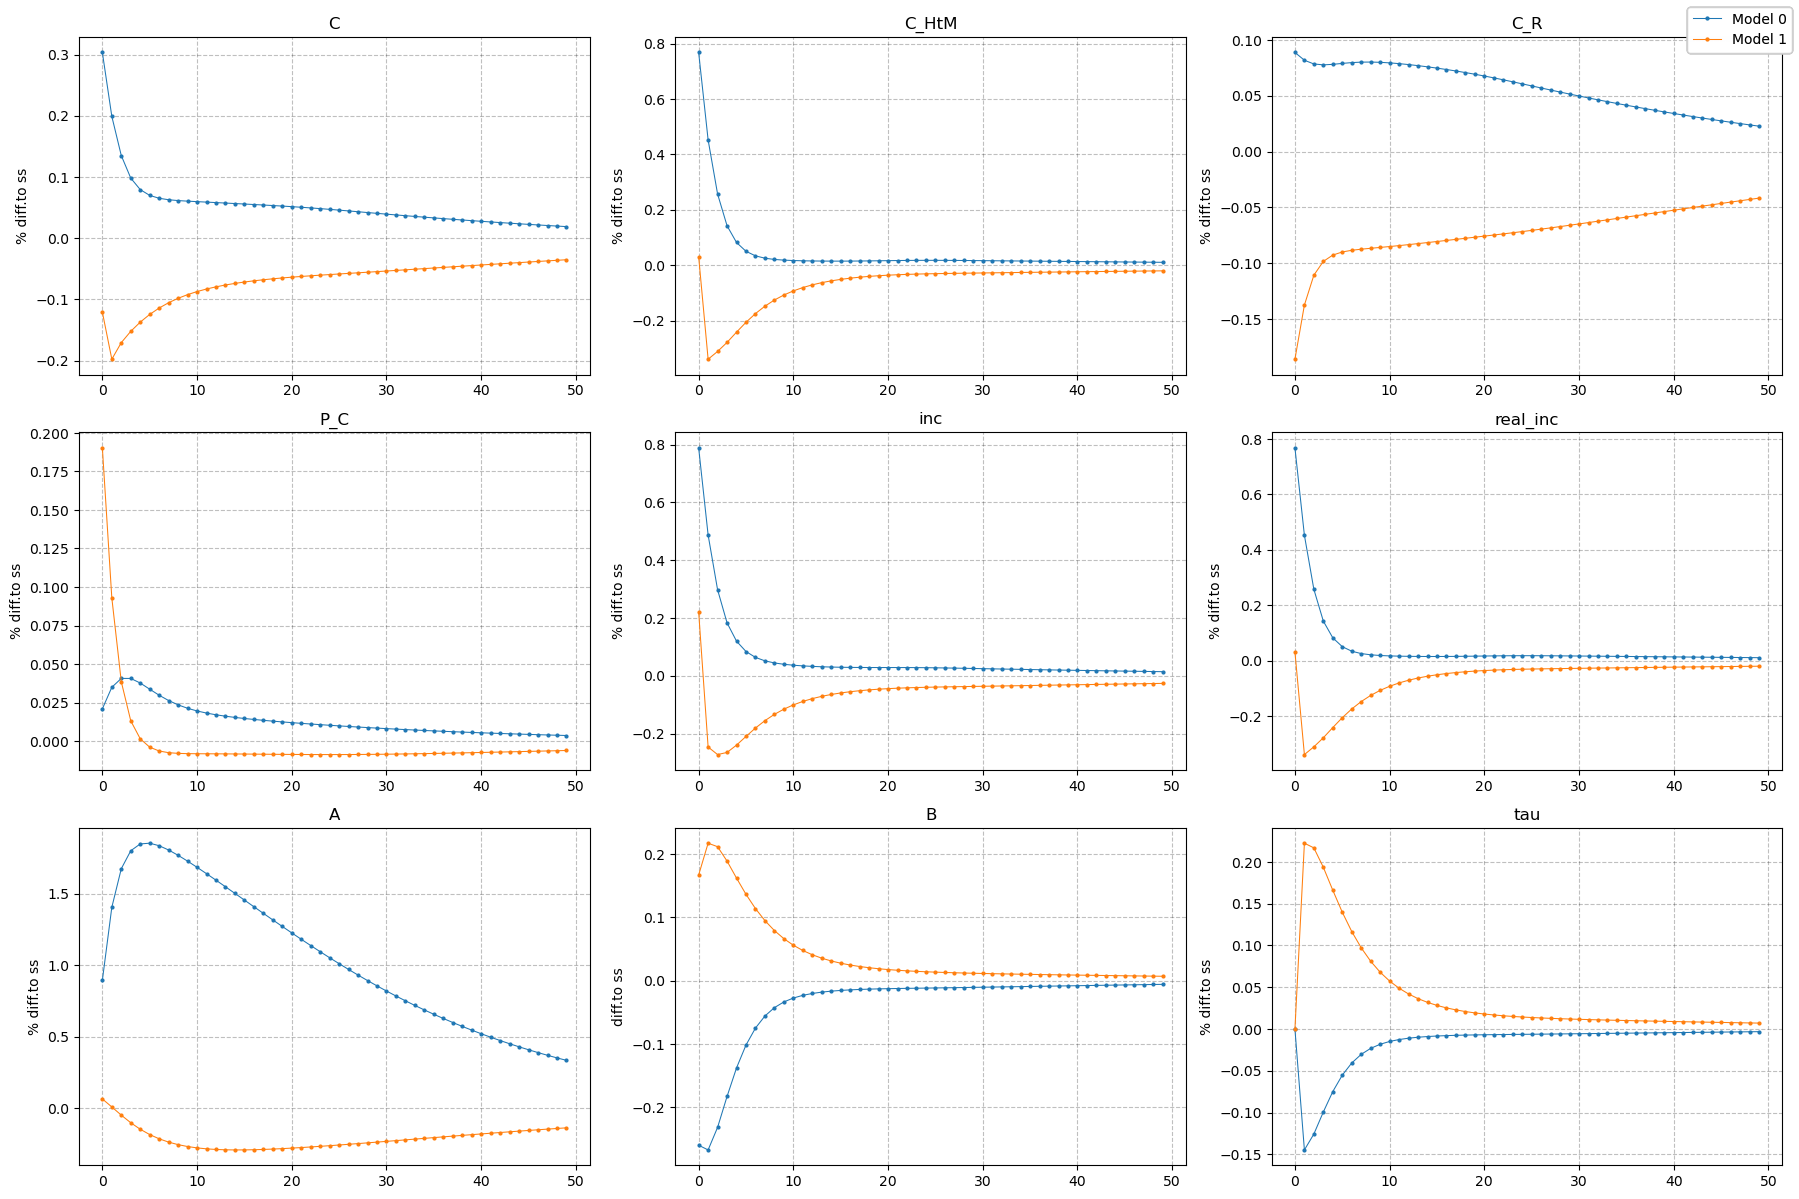

In [145]:
model.plot_IRF_models_extra(models,varlist=['C','C_HtM','C_R','P_C','inc','real_inc','A', 'B', 'tau'])